# PYDA-15 Final work

In [1]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


from pylab import rcParams
rcParams['figure.figsize'] = 10,7

<div class="alert alert-info">
<b>1. Загрузите файл HR.csv в pandas dataframe</b>
</div>

1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты

In [2]:
# Читаем файл и оцениваем информацию; имеем 6 столбцов с числовыми величинами (из них 3 непрерывные и 3 дискретные),
# и 5 с категориальными; пропусков в данных нет
buddies = pd.read_csv('HR.csv')
print(buddies.info())
buddies.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


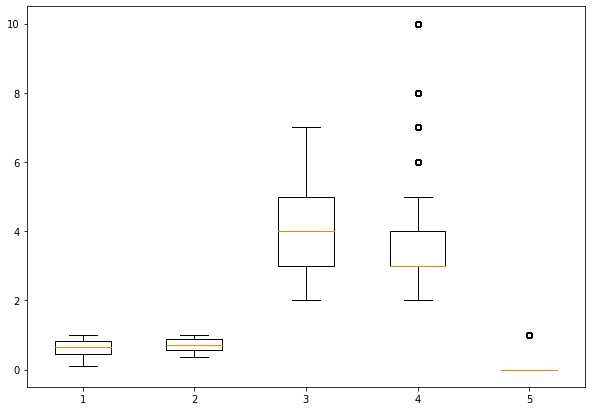

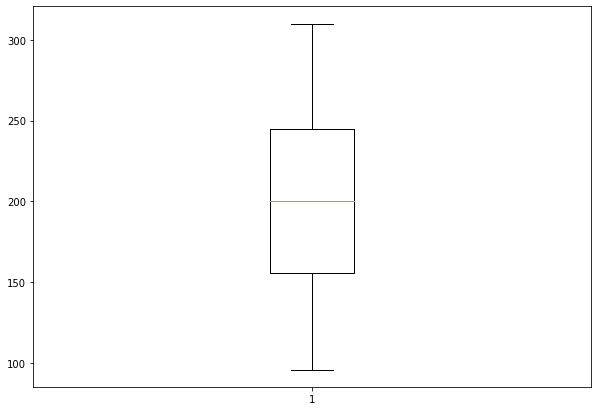

In [3]:
# визуализируем числовые столбцы, чтобы проверить отсутствие выбросов; убеждаемся, что явных выбросов нет
plt.boxplot([
    buddies['satisfaction_level'],
    buddies['last_evaluation'],
    buddies['number_project'],
    buddies['time_spend_company'],
    buddies['Work_accident']
])
plt.show()

plt.boxplot([buddies['average_montly_hours']])
plt.show()

<div class="alert alert-info">
<b>2. Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение)</b>
</div>

In [4]:
# Сформируем датафрейм из метрик исходного датасета (describe + mode)
pd.concat([
    buddies.describe(),
    pd.DataFrame(buddies.mode().iloc[0]).T.rename(index={0: 'mode'})
]).round(3)

# отметим большой разброс значений average_montly_hours (перцентили и СКО) и низкое модальное значение уровня
# удовлетворенности satisfaction_level_mode = 0.1

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
count,14999,14999,14999,14999,14999,14999,14999,14999,NaN,NaN
mean,0.612834,0.716102,3.80305,201.05,3.49823,0.14461,0.238083,0.0212681,NaN,NaN
std,0.248631,0.171169,1.23259,49.9431,1.46014,0.351719,0.425924,0.144281,NaN,NaN
min,0.09,0.36,2,96,2,0,0,0,NaN,NaN
25%,0.44,0.56,3,156,3,0,0,0,NaN,NaN
50%,0.64,0.72,4,200,3,0,0,0,NaN,NaN
75%,0.82,0.87,5,245,4,0,0,0,NaN,NaN
max,1,1,7,310,10,1,1,1,NaN,NaN
mode,0.1,0.55,4,135,3,0,0,0,sales,low


<div class="alert alert-info">
<b>3. Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные</b>
</div>

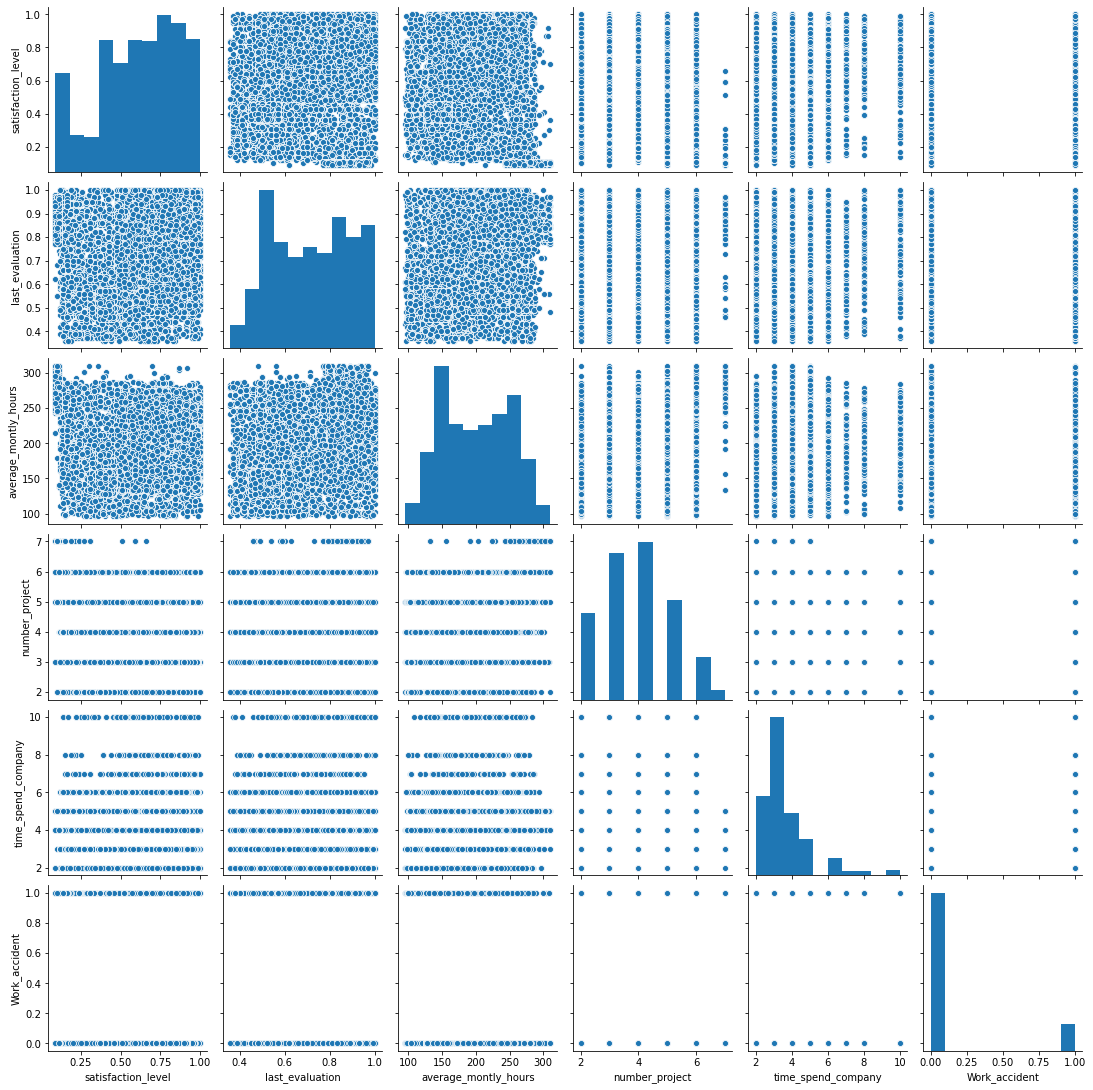

In [5]:
# Для анализа корреляции величин сформируем датасет из числовых столбцов исходного датасета, и визуализируем
# взаимосвязь между парами величин; отметим, что в датасет включены 3 дискретных величины, получить информативную 
# визуализацию корреляции по которым весьма затруднительно
quan = buddies[[
    'satisfaction_level',
    'last_evaluation',
    'average_montly_hours',
    'number_project',
    'time_spend_company',
    'Work_accident'
]]

sns.pairplot(quan)

In [6]:
# как отмечено выше, для дискретных величин оценить корреляцию по визуализации не удалось; что до величин непрерывных,
# обнаружить какие бы то ни было зависимости графически также едва ли возможно.
# Посмотрим на корреляционную матрицу и соответствующую ей тепловую карту; поскольку ряд величин являются дискретными,
# при расчете будем использовать коэффициент корреляции Кендалла
quan.corr(method='kendall').round(3)

,satisfaction_level,last_evaluation,average_montly_hours,number_project,time_spend_company,Work_accident
satisfaction_level,1.000,0.114,0.051,0.022,-0.110,0.046
last_evaluation,0.114,1.000,0.235,0.266,0.119,-0.005
average_montly_hours,0.051,0.235,1.000,0.307,0.119,-0.005
number_project,0.022,0.266,0.307,1.000,0.195,0.002
time_spend_company,-0.110,0.119,0.119,0.195,1.000,-0.025
Work_accident,0.046,-0.005,-0.005,0.002,-0.025,1.000


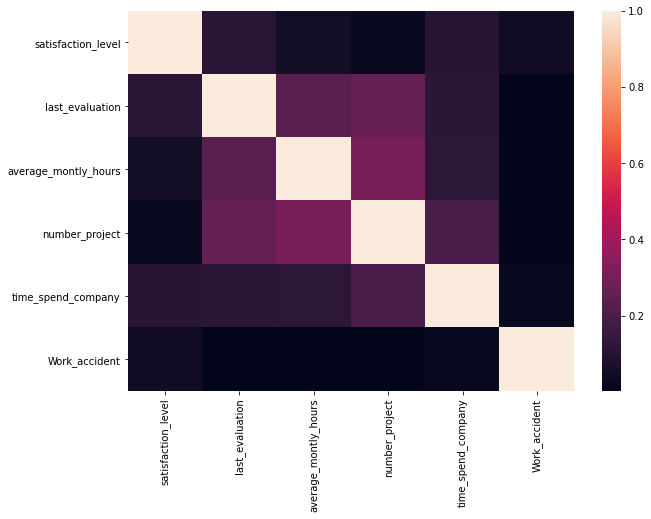

In [7]:
# тепловая карта
sns.heatmap(quan.corr(method='kendall').abs())

In [ ]:
# делаем вывод, что пару наиболее скоррелированных величин составляют number_project и average_montly_hours (K=0.307);
# корреляция положительная, что логично (большее количество проектов подразумевает большее время работы);
# наименьшая корреляция наблюдается между величиной Work_accident и другими метриками; это также представляется 
# логичным в свете того, что несчастный случай может случиться с каждым в любой момент;
# наименее скоррелированными величинами оказались Work_accident и number_project (K=0.002)

<div class="alert alert-info">
<b>4. Рассчитайте, сколько сотрудников работает в каждом департаменте</b>
</div>

In [10]:
# Сгруппируем по department и отбросим лишние столбцы
buddies.groupby('department').count()[['left']].sort_values('left', ascending=False)\
 .rename(columns={'left': 'employee_number'})

,employee_number
department,
sales,4140
technical,2720
support,2229
IT,1227
product_mng,902
marketing,858
RandD,787
accounting,767
hr,739


<div class="alert alert-info">
<b>5. Показать распределение сотрудников по зарплатам</b>
</div>

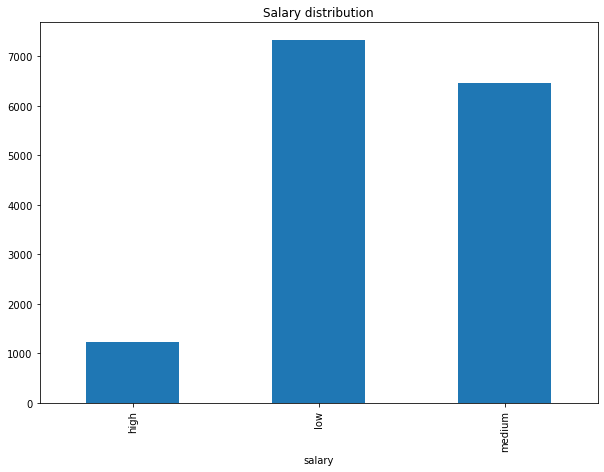

In [11]:
# Отбросим лишние столбцы и сгруппируем по полю salary
salaries = buddies[['department', 'salary']].groupby('salary').count()
salaries.plot(kind='bar', title='Salary distribution', legend=False)

<div class="alert alert-info">
<b>6. Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности</b>
</div>

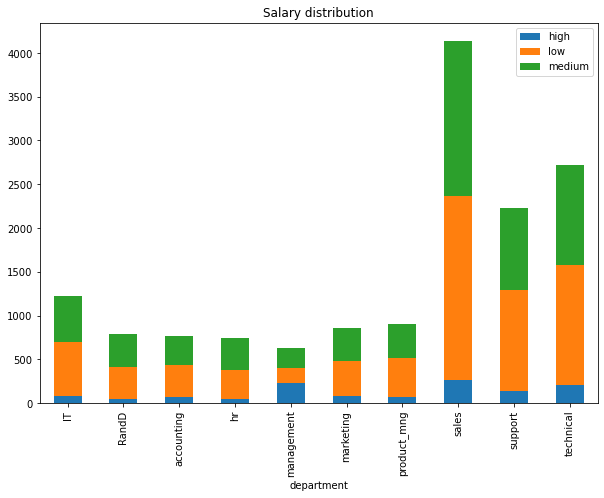

In [12]:
# Группируем по интересующим полям и переименовываем столбец, к которому применялась агрегатная функция (left)
salary_by_dep = buddies.groupby(['department','salary']).count()[['left']].rename(columns={'left': 'count'})

# визуализируем, предварительно преобразовав датафрейм
ax = salary_by_dep.unstack().plot(kind='bar', title='Salary distribution', stacked=True)
ax.legend(['high','low','medium'])

<div class="alert alert-info">
<b>7. Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом</b>
</div>

In [13]:
# Сформулируем нулевую гипотезу о том, что оклад не связан со временем, проводимым на работе, и альтернативную,
# гласящую, что сотрудники с разным уровнем дохода проводят на работе разное количство времени;
# применим однофакторный дисперсионный анализ для проверки гипотиз, положим уровень значимости равным 0,05
alpha = 0.05

high = buddies.loc[buddies.salary == 'high']['average_montly_hours']
medium = buddies.loc[buddies.salary == 'medium']['average_montly_hours']
low = buddies.loc[buddies.salary == 'low']['average_montly_hours']

fvalue, pvalue = stats.f_oneway(high, medium, low)
print(fvalue, pvalue)

0.4583624407867663 0.6323271153144614


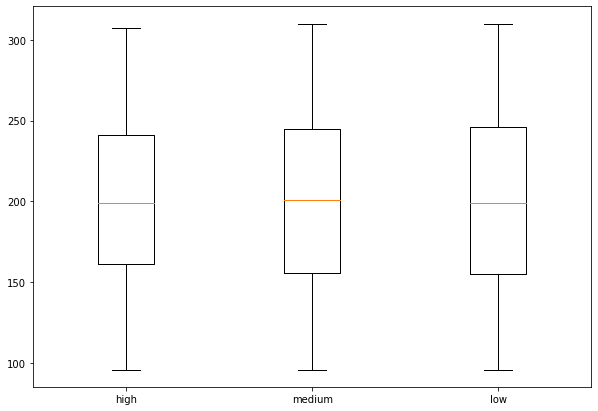

In [14]:
# получили p-value 0.63, что значительно превышает принятый уровень значимости; таким образом, мы не можем отвергнуть
# нулевую гипотезу, и признать отличия между выборками статистически значимыми, т.е. уровень оклада не связан со 
# средней величиной времени, проводимого на работе

# визуализируем выборки и убедимся, что распределения схожи
plt.boxplot([high, medium, low])
plt.xticks([1, 2, 3], ['high', 'medium', 'low'])
plt.show()

<div class="alert alert-info">
<b>8. Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):
<ul>
    <li>Доля сотрудников с повышением за последние 5 лет</li>
    <li>Средняя степень удовлетворенности</li>
    <li>Среднее количество проектов</li>
</ul>
</b>
</div>

In [15]:
# Разобьем исходный датасет на два множества
left = buddies.loc[buddies.left == 1]
stay = buddies.loc[buddies.left == 0]

# преставим результат в виде датафрейма
to_leave_or_not_to_leave = pd.DataFrame([
    [
        (left['promotion_last_5years'].sum()/left['promotion_last_5years'].count())*100,
        left['satisfaction_level'].mean(),
        left['number_project'].mean()
    ],
    [
        (stay['promotion_last_5years'].sum()/stay['promotion_last_5years'].count())*100,
        stay['satisfaction_level'].mean(),
        stay['number_project'].mean()
    ]],
    columns=['promoted_last_5 %', 'mean_satisfaction', 'mean_projects'],
    index = ['left','stay'])

to_leave_or_not_to_leave.round(3)

,promoted_last_5 %,mean_satisfaction,mean_projects
left,0.532,0.440,3.856
stay,2.625,0.667,3.787


<div class="alert alert-info">
<b>9. Разделить данные на тестовую и обучающую выборки.
Построить модель LDA, предсказывающую, уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary).
Оценить качество модели на тестовой выборке.</b>
</div>

In [16]:
# Сформируем датасет с факторами (data) и датасет с целевой величиной (target)
data = buddies[[
    'satisfaction_level',
    'last_evaluation',
    'number_project',
    'average_montly_hours',
    'time_spend_company',
    'Work_accident',
    'promotion_last_5years'
]]
target = buddies['left']

In [17]:
# разделим выборку на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25)

In [18]:
# создадим экземпляр LDA-модели, обучим её и предскажем значения искомой величины на тестовой выборке
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda.predict(X_test)

# рассчитаем точность модели; полученная точность - 75-76% (в зависимости от random_state обучающей и тестовой выборок)
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
accuracy_score(y_test, lda.predict(X_test))

0.7512

<div class="alert alert-info">
<b>10. Загрузить jupyter notebook с решение на github и прислать ссылку</b>
</div>